<a href="https://colab.research.google.com/github/anirudh4git/Text_Clustering/blob/main/Text_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset = fetch_20newsgroups(download_if_missing=True)

In [ ]:
news_list = dataset.data

In [ ]:
len(dataset.target_names)

20

In [ ]:
len(news_list)

11314

In [ ]:
news_list[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
df_new = pd.DataFrame(data = news_list,columns=['news'])

## Checking for duplicated tweets

In [ ]:
df_new.duplicated().sum()

0

## Removing punctuations and stopwords

In [ ]:
def text_process(msg):
  # Removing Punctuations
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  # removing Stopwords
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df = pd.DataFrame(data = news_list,columns=['news'])

In [ ]:
df

,news
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


In [ ]:
df['news'] = df['news'].apply(text_process)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,news
0,lerxstwamumdedu wheres thing Subject car NntpP...
1,guykuocarsonuwashingtonedu Guy Kuo Subject SI ...
2,twillisececnpurdueedu Thomas E Willis Subject ...
3,jgreenamber Joe Green Subject Weitek P9000 Org...
4,jcmheadcfaharvardedu Jonathan McDowell Subject...


## top words before stemming

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['news'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
# Making Lists
vocab = []
count = []

# Creating a DataFrame for word counts
for wrd,cnt in dictionary:
  vocab.append(wrd)
  count.append(cnt)
count_df = pd.DataFrame(data=count,index=vocab,columns=['count'])

In [ ]:
top_vocab = count_df.sort_values(by='count',ascending=False).head(10)

[(138550.0, 138600.0)]

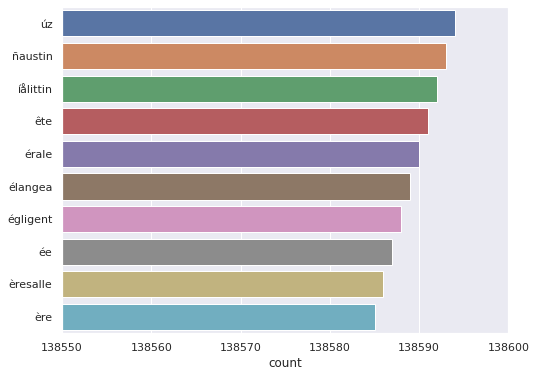

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot( x='count', y=top_vocab.index, data=top_vocab).set(xlim= (138550,138600))

## Applying Stemming

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
df['news'] = df['news'].apply(stemming)

In [ ]:
df.head()

,news
0,lerxstwamumdedu where thing subject car nntppo...
1,guykuocarsonuwashingtonedu guy kuo subject si ...
2,twillisececnpurdueedu thoma e willi subject pb...
3,jgreenamb joe green subject weitek p9000 organ...
4,jcmheadcfaharvardedu jonathan mcdowel subject ...


## Top Words after stemming

In [ ]:
# create a count vectorizer object
count_vectorizer2 = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer2.fit(df['news'])
# collect the vocabulary items used in the vectorizer
dictionary2 = count_vectorizer2.vocabulary_.items()

In [ ]:
# Making Lists
vocab2 = []
count2 = []

# Creating a DataFrame for word counts
for wrd,cnt in dictionary2:
  vocab2.append(wrd)
  count2.append(cnt)
count_df2 = pd.DataFrame(data=count2,index=vocab2,columns=['count'])

[(118550.0, 119000.0)]

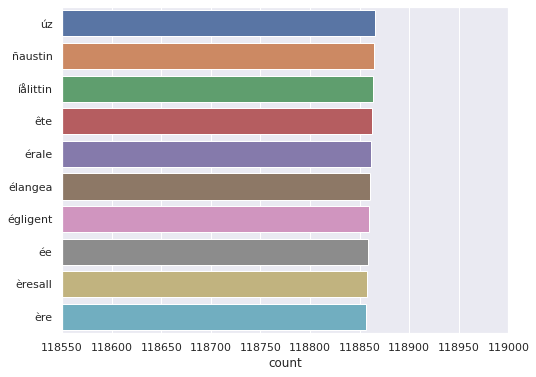

In [ ]:
top_vocab2 = count_df2.sort_values(by='count',ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot( x='count', y=top_vocab2.index, data=top_vocab2).set(xlim= (118550,119000))

## Tfidf Vectorizer

In [ ]:
df.shape

(11314, 1)

In [ ]:
tf_vectorizer = TfidfVectorizer(max_df = 9000,min_df = 3)
H = tf_vectorizer.fit_transform(df['news'])

In [ ]:
len(tf_vectorizer.get_feature_names())

28553

In [ ]:
X = H.toarray()

In [ ]:
tf_vectorizer.get_feature_names()[18001]

'nameaddress'

In [ ]:
X.shape

(11314, 28553)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
#dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

## KMeans

In [ ]:
n_clusters = [10,20]
for cluster in n_clusters:
  clusterer = KMeans(n_clusters=cluster, random_state=19,max_iter=100,n_init = 1)
  cluster_labels = clusterer.fit_predict(X)

  # The silhouette_score gives the average value for all the samples.
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("\033[1mFor n_clusters =\033[1m", cluster,
        "\033[1mThe average silhouette_score is\033[1m :", silhouette_avg)
  print('\n')
  # Getting the list of 10 words of each cluster
  order_centroids = clusterer.cluster_centers_.argsort()[:, ::-1]
  terms = tf_vectorizer.get_feature_names()
  for i in range(cluster):
    print(f'Cluster: {i+1}')
    list_ = []
    for ind in order_centroids[i, :10]:
      list_.append(terms[ind])
    print(list_)
    print('\n')
  print('\n\n')


For n_clusters = 10 The average silhouette_score is : 0.005349197684776204


Cluster: 1
['god', 'christian', 'jesus', 'believ', 'bibl', 'peopl', 'one', 'say', 'christ', 'faith']


Cluster: 2
['drive', 'card', 'scsi', 'driver', 'video', 'disk', 'ide', 'simm', 'use', 'problem']


Cluster: 3
['gun', 'peopl', 'would', 'isra', 'israel', 'govern', 'right', 'write', 'articl', 'law']


Cluster: 4
['key', 'encrypt', 'clipper', 'chip', 'secur', 'escrow', 'govern', 'use', 'system', 'crypto']


Cluster: 5
['univers', 'nntppostinghost', 'thank', 'use', 'email', 'distribut', 'comput', 'pleas', 'write', 'anyon']


Cluster: 6
['window', 'file', 'use', 'program', 'dos', 'run', 'problem', 'font', 'applic', '31']


Cluster: 7
['game', 'team', 'player', 'play', 'win', 'year', 'hockey', 'basebal', 'season', 'score']


Cluster: 8
['space', 'write', 'articl', 'one', 'would', 'bank', 'like', 'gordon', 'dont', 'get']


Cluster: 9
['armenian', 'moral', 'turkish', 'keith', 'object', 'armenia', 'turk', 'argic', '

## As we can see these clusters are seeming quite relevant. Some clusters for the news correspond to RELEGION,  MOTORCYCLES,  IT-STUFF,  SEXUALITY,  ARAB-WORLD etc.

## Different different clusters seem to be meaningfully separated.

## PCA 

In [ ]:
pca = PCA(n_components= 2)
X_reduced = pca.fit_transform(X)

In [ ]:
ratios = pca.explained_variance_ratio_
ratios

array([0.00580307, 0.0039892 ])

In [ ]:
clusterer2 = KMeans(n_clusters=10, random_state=19,max_iter=100,n_init = 1)
cluster_labels2 = clusterer2.fit_predict(X_reduced)

In [ ]:
cluster_labels2.tolist()

In [ ]:
len(cluster_labels2)

11314

In [ ]:
X_reduced[:,0]

array([-0.03788676, -0.07612472, -0.00761659, ..., -0.06027137,
       -0.00390261, -0.04443525])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


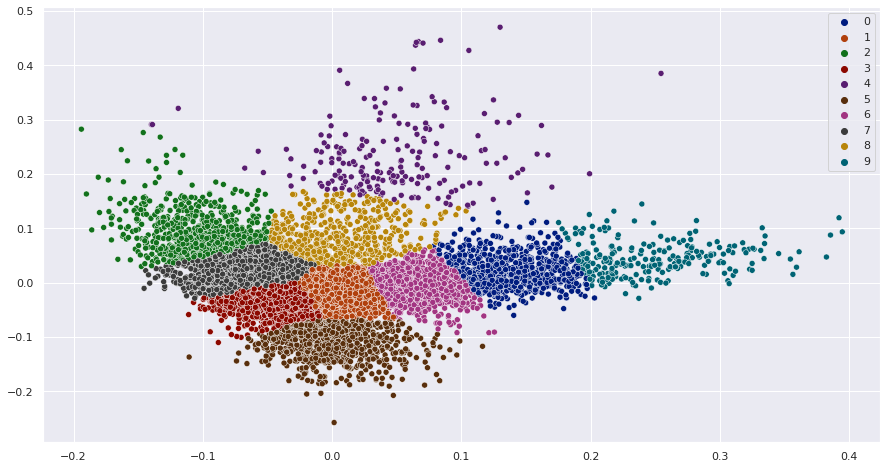

In [ ]:
plt.figure(figsize =(15,8))
sns.scatterplot(X_reduced[:,0], X_reduced[:,1],hue=cluster_labels2,palette= 'dark' )

## This is the two dimensional view for 10 different clusters.

## Heirarchical Clustering

In [ ]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_reduced)

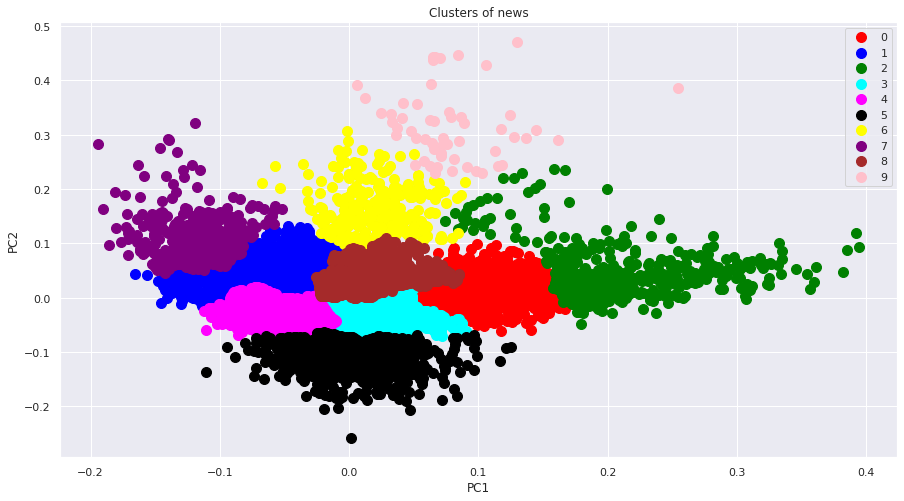

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X_reduced[y_hc == 0, 0], X_reduced[y_hc == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X_reduced[y_hc == 1, 0], X_reduced[y_hc == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(X_reduced[y_hc == 2, 0], X_reduced[y_hc == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(X_reduced[y_hc == 3, 0], X_reduced[y_hc == 3, 1], s = 100, c = 'cyan', label = '3')
plt.scatter(X_reduced[y_hc == 4, 0], X_reduced[y_hc == 4, 1], s = 100, c = 'magenta', label = '4')
plt.scatter(X_reduced[y_hc == 5, 0], X_reduced[y_hc == 5, 1], s = 100, c = 'black', label = '5')
plt.scatter(X_reduced[y_hc == 6, 0], X_reduced[y_hc == 6, 1], s = 100, c = 'yellow', label = '6')
plt.scatter(X_reduced[y_hc == 7, 0], X_reduced[y_hc == 7, 1], s = 100, c = 'purple', label = '7')
plt.scatter(X_reduced[y_hc == 8, 0], X_reduced[y_hc == 8, 1], s = 100, c = 'brown', label = '8')
plt.scatter(X_reduced[y_hc == 9, 0], X_reduced[y_hc == 9, 1], s = 100, c = 'pink', label = '9')
plt.title('Clusters of news')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

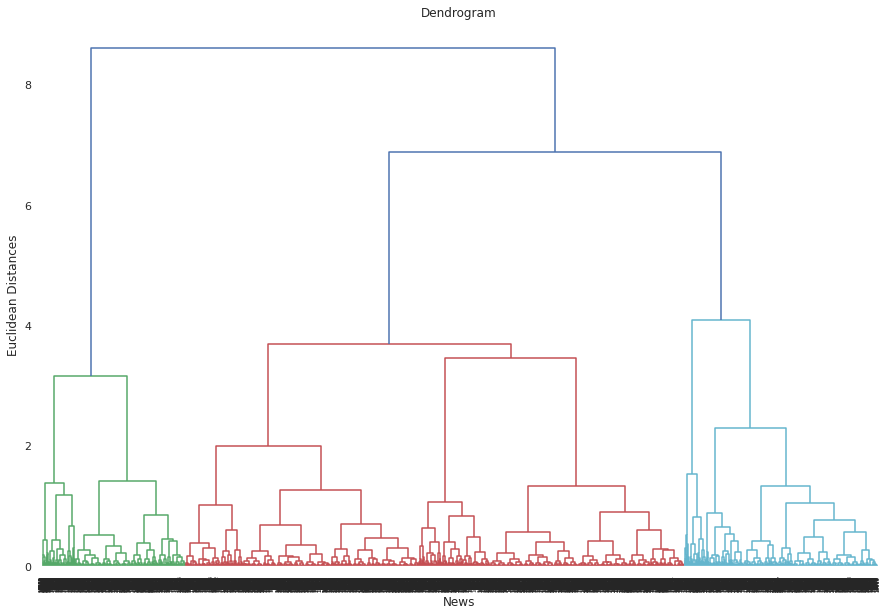

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('News')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

## ROUGH WORK

In [ ]:
order_centroids = clusterer.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()


In [ ]:
clusterer.cluster_centers_.shape

(20, 28553)

In [ ]:
clusterer.cluster_centers_.argsort()[:,::-1].shape

(20, 28553)

In [ ]:
order_centroids[:,:12]

array([[12032,  6971, 14556,  5164,  5307, 19770, 19007, 22629, 10718,
         7004,  6966, 27926],
       [ 6426, 17547, 27045, 23398,  9542, 27015,  7368, 26670,  6068,
        27745,  8957, 17475],
       [12414, 19770, 27926, 12130, 21978, 15603,  9378, 19007, 25430,
        27965, 15886, 27446],
       [27673, 17656, 23073, 26670, 27745,  4175, 28230, 15075, 22346,
         9170, 28024, 20704],
       [ 9537, 22832, 13553,  9143, 12648,  7737, 11154, 20665,  5645,
        16326, 26670, 25061],
       [22494, 18895, 23242, 20604, 22986, 13776,  7568, 10045, 18260,
        16554, 26450,  9209],
       [27734, 25150,  8171,  6401, 28304, 25795, 25538, 11656, 22888,
        21469, 20088, 28324],
       [ 6407,  8865, 21151, 10161, 18936, 11855, 27926,  8531, 27965,
         9537,  4393, 19007],
       [ 4335, 26071,  4333, 26068,  4301, 23056, 26069, 12240, 11796,
        23052,  4734, 19770],
       [ 5337, 21962, 17663,  9303,  9328, 12876,  4393, 21963, 27965,
        11855, 15886